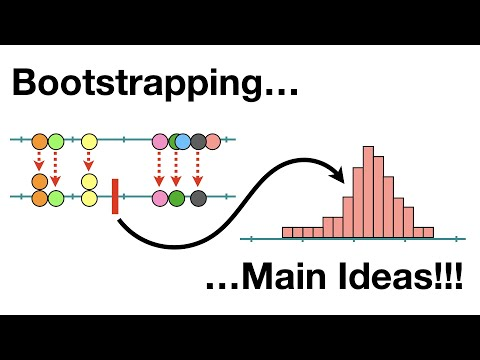

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Question 1

Standard deviation describe how spread out the data is, standard error of the mean descirbes how accurate the sample mean is as an estimate of the population mean. Standard error of the mean is derived from the standard deviation and decreases as the sample size increases, indicating greater precision in estimating the population mean.

Question 2

To create a 95% confidence interval using the standard error of the mean, we multiply the standard error of the mean by the appropriate critical value from the t-distribution or normal distribution if the sample is large. For a 95% confidence level, this critical value is typically around 1.96 for large samples.

Question 3

First, resample the original data multiple times to generate a large number of bootstrapped sample means. The sort these bootstrapped means in ascending order. Last, find the 2.5th percentile and the 97.5th percentile of the sorted bootstrapped means. The intervals between these are 95% confidence interval. 

Question 4

In [6]:
import numpy as np

# Sample data
sample = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Replace with your actual sample data

# Number of bootstrap resamples
n_bootstraps = 1000

# Empty array to store bootstrap statistics
bootstrap_means = []

# Perform bootstrap sampling
for _ in range(n_bootstraps):
    # Generate a bootstrap sample by sampling with replacement from the original sample
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Compute the statistic of interest (mean in this case) and store it
    bootstrap_means.append(np.mean(bootstrap_sample))

# Compute the 95% confidence interval (percentile method)
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Display the results
print(f"95% Bootstrap Confidence Interval for the Mean: ({lower_bound}, {upper_bound})")

# ---- Modification to Compute CI for Other Parameters ----
# To calculate the 95% CI for the population median instead of the mean:
# Replace np.mean(bootstrap_sample) with np.median(bootstrap_sample) in the loop above.
# Example: bootstrap_medians.append(np.median(bootstrap_sample))


95% Bootstrap Confidence Interval for the Mean: (3.8, 7.2)


Question 5

We distinguish between the population parameter and the sample statistic because they represent different concepts. A confidence interval is constructed around the sample statistic to provide a range of plausible values for the population parameter. This distinction is key because the confidence interval uses the variability of the sample statistic to infer information about the unknown population parameter. 

Question 6

What is the process of bootstrapping?

Bootstrapping is when we take a sample of data and create a bunch of new samples by randomly picking data points from the original sample, allowing repeats. We will do this many times to see how the results might change with different samples.

What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to estimate how much a statistic, like the average, might vary if we could take lots of different samples. It helps us understand the uncertainty in our data without needing a bigger sample.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

I can use bootstrapping to see if my guess about the average makes sense by comparing it to the averages I get from many bootstrapped samples. If my guess falls within the range of most of the bootstrapped averages, it’s probably a reasonable guess. If not, it might be off.

Question 7

When a confidence interval includes zero, it means that zero could be the true result, so we can’t be sure the drug actually does anything. That’s why we don't reject the null hypothesis. If the confidence interval dosen't includes zero it means zero isn’t a likely result. This would suggest the drug probably does have an effect, and we would reject the null hypothesis. 

Question 8

In [7]:
import pandas as pd
import numpy as np
from scipy import stats

# Step 1: Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Step 2: Calculate the change in health score
df['ChangeInHealthScore'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 3: Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(df['FinalHealthScore'], df['InitialHealthScore'])

# Step 4: Calculate the confidence interval for the mean change
mean_change = df['ChangeInHealthScore'].mean()
sem = stats.sem(df['ChangeInHealthScore'])  # Standard Error of the Mean
ci = stats.t.interval(0.95, len(df['ChangeInHealthScore'])-1, loc=mean_change, scale=sem)

# Display results
print(f"Mean Change in Health Score: {mean_change}")
print(f"t-statistic: {t_statistic}, p-value: {p_value}")
print(f"95% Confidence Interval: {ci}")

# Step 5: Interpret the results
if p_value < 0.05:
    print("We reject the null hypothesis: The vaccine is effective.")
else:
    print("We fail to reject the null hypothesis: The vaccine is not effective.")


Mean Change in Health Score: 3.3
t-statistic: 2.5900615612703937, p-value: 0.02921052381549256
95% Confidence Interval: (0.4177833188707214, 6.182216681129278)
We reject the null hypothesis: The vaccine is effective.


The vaccine has no effect on health scores.
This means that any observed change in health scores after vaccination is due to random chance rather than the vaccine itself.

Key Points to Consider:

Public Health Importance: Understanding the vaccine's effectiveness is vital for public health. If it does improve health outcomes, it can lead to broader adoption and implementation in healthcare practices.

Clinical Relevance: The difference in health scores pre- and post-vaccination can indicate the vaccine's impact on quality of life. Even small improvements can have significant implications for patient health and healthcare costs.

Statistical Validation: By applying statistical tests (like t-tests) and creating confidence intervals, we can scientifically validate the effectiveness of the vaccine, providing evidence for healthcare professionals and policymakers.

To visualize the comparison effectively, I will use the following plots:

Bar Plot: Comparing Initial and Final Health Scores
Box Plot: Showing the distribution of scores before and after vaccination
Scatter Plot: Illustrating the relationship between Initial and Final Health Scores

In [8]:
pip install matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


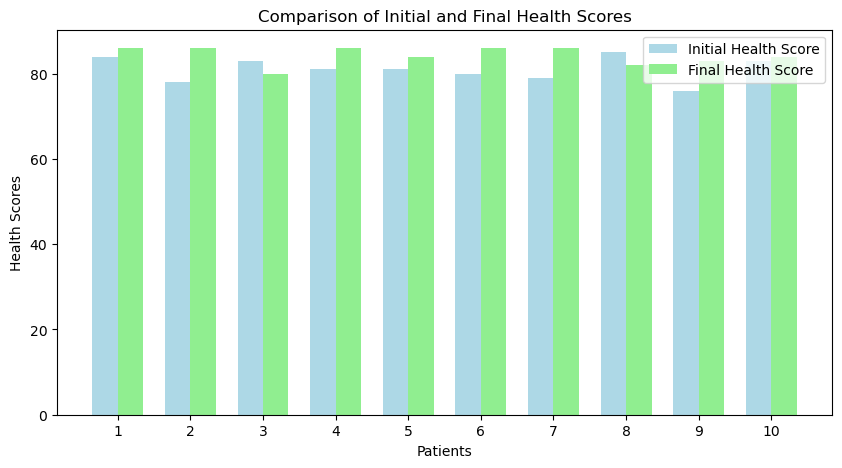

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# 1. Bar Plot of Initial vs. Final Health Scores
plt.figure(figsize=(10, 5))
bar_width = 0.35
x = range(len(df))

# Plotting
plt.bar(x, df['InitialHealthScore'], width=bar_width, label='Initial Health Score', color='lightblue')
plt.bar([i + bar_width for i in x], df['FinalHealthScore'], width=bar_width, label='Final Health Score', color='lightgreen')

# Labels and Title
plt.xlabel('Patients')
plt.ylabel('Health Scores')
plt.title('Comparison of Initial and Final Health Scores')
plt.xticks([i + bar_width / 2 for i in x], df['PatientID'])  # Centering x-ticks
plt.legend()
plt.show("png")

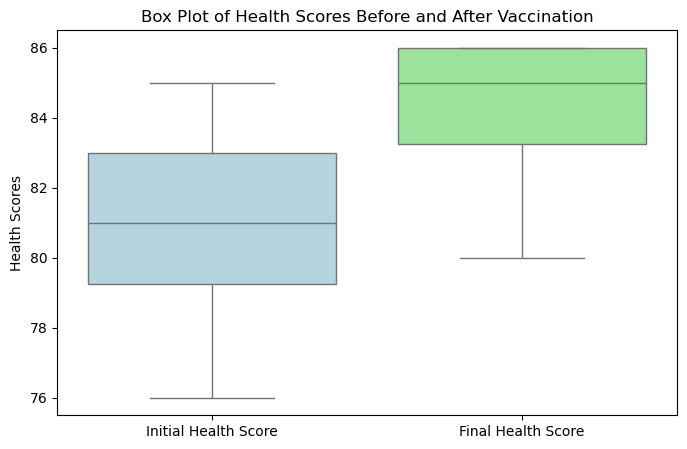

In [17]:
# 2. Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=[df['InitialHealthScore'], df['FinalHealthScore']], palette=['lightblue', 'lightgreen'])
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.ylabel('Health Scores')
plt.title('Box Plot of Health Scores Before and After Vaccination')
plt.show("png")

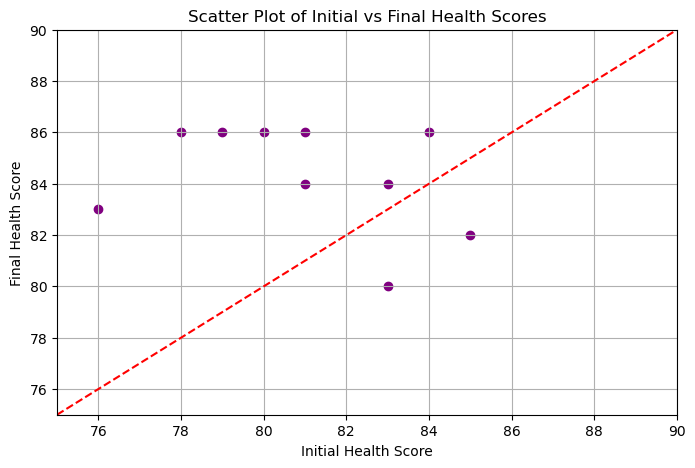

In [18]:
# 3. Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['InitialHealthScore'], df['FinalHealthScore'], color='purple')
plt.plot([75, 90], [75, 90], color='red', linestyle='--')  # Line indicating no change
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.title('Scatter Plot of Initial vs Final Health Scores')
plt.xlim(75, 90)
plt.ylim(75, 90)
plt.grid()
plt.show("png")

Summary of Results

The mean change in health scores after vaccination was found to be 3.3 points, indicating an overall improvement in patient health. The t-statistic was 2.59, with a corresponding p-value of 0.029. Since the p-value is less than the common alpha level of 0.05, we reject the null hypothesis, suggesting that the vaccine has a statistically significant effect on health scores. The 95% confidence interval for the mean change in health scores was calculated as (0.42, 6.18). This interval does not include zero, further supporting the conclusion that there is a significant effect of the vaccine.

In this analysis, the null hypothesis was that the vaccine has no effect on health scores.

Rejecting the Null Hypothesis: The analysis provided sufficient evidence to reject the null hypothesis. The statistically significant p-value (0.029) indicates that the observed change in health scores is unlikely to be due to random chance alone.

Meaning of Rejection: Rejecting the null hypothesis suggests that the vaccine does indeed have a positive effect on improving health scores. This conclusion is important for furthering research and implementation of the vaccine in clinical settings.

Further Considerations

Diverse Populations: Further research should include diverse demographic groups to understand how the vaccine performs across different populations.

Sample Size: The sample size of 10 patients is relatively small, which may limit the generalizability of the findings. Larger studies are needed to confirm these results and ensure they are applicable to broader populations.

Question 9

Yes